In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

import plotly.io as pio
from IPython.display import Image
# %pip install -U kaleido
# %pip install -U condacolab
# %pip install -U setuptools
# %pip install -U google-api-python-client
# %pip install -U google.cloud.bigquery
# %pip install -U google.cloud.storage
# %pip install -U google-colab
# %conda install -c conda-forge google-colab

# import condacolab
# condacolab.install()

In [4]:
pd.set_option('display.max_columns', None)

## Downloading and researching data

In [5]:
listings = pd.read_csv('listings.csv.gz')
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.5 baths,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,3,3,30,30,3.0,30.0,NaN,t,0,0,0,53,2025-06-17,302,28,1,53,26,218,28776.0,2012-01-09,2025-06-11,4.92,4.90,4.94,4.95,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,1,2,730,730,2.0,730.0,NaN,t,1,2,4,130,2025-06-17,710,93,9,31,96,255,19890.0,2010-08-22,2025-06-16,4.88,4.90,4.87,4.94,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36584,4.89111,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", 

In [6]:
listings.shape

(10168, 79)

In [7]:
cols = listings.columns.tolist()
print(cols)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10168 non-null  int64  
 1   listing_url                                   10168 non-null  object 
 2   scrape_id                                     10168 non-null  int64  
 3   last_scraped                                  10168 non-null  object 
 4   source                                        10168 non-null  object 
 5   name                                          10168 non-null  object 
 6   description                                   9859 non-null   object 
 7   neighborhood_overview                         5258 non-null   object 
 8   picture_url                                   10168 non-null  object 
 9   host_id                                       10168 non-null 

In [9]:
# Deleting empty data 
listings = listings.drop(columns=['neighbourhood_group_cleansed'])

In [10]:
listings_2 = pd.read_csv('listings.csv', index_col = 'id')
cols2 = listings.columns.tolist()
print(cols2)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped

In [11]:
c = list(set(cols2) - set(cols))
print(c)

# There are no differences 

[]


The file 'listing.csv' contains less data than 'listings.csv.gz'
Therefore further I will work with the file 'listings.csv.gz'

A file with the names of Amsterdam neighbourhoods 'neighbourhoods.csv'
The file doesn't contain anything useful for analysis 

In [12]:
neighbour = pd.read_csv('neighbourhoods.csv')
neighbour

,neighbourhood_group,neighbourhood
0,NaN,Bijlmer-Centrum
1,NaN,Bijlmer-Oost
2,NaN,Bos en Lommer
3,NaN,Buitenveldert - Zuidas
4,NaN,Centrum-Oost
5,NaN,Centrum-West
6,NaN,De Aker - Nieuw Sloten
7,NaN,De Baarsjes - Oud-West
8,NaN,De Pijp - Rivierenbuurt
9,NaN,Gaasperdam - Driemond


A file with accommodation reviews:

In [13]:
reviews = pd.read_csv('reviews.csv.gz', index_col='id')
reviews.head(5)

,listing_id,date,reviewer_id,reviewer_name,comments
id,,,,,
4796982,1182656,2013-05-26,6511386,Karim,Marc was a very friendly guy. When we got to h...
4952124,1182656,2013-06-03,1409171,Tomas,Great. Very good location. Friendly host. Accu...
5014762,1182656,2013-06-07,6444385,Charles,Marc is an incredibly nice person and a gracio...
5073754,1182656,2013-06-10,3333785,Laura,Marc's apartment is a beautiful place located ...
5091378,1182656,2013-06-11,6608456,Sally,This was our first time using Airbnb and were ...


In [14]:
reviews.shape

(483680, 5)

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483680 entries, 4796982 to 1433979383777632974
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     483680 non-null  int64 
 1   date           483680 non-null  object
 2   reviewer_id    483680 non-null  int64 
 3   reviewer_name  483679 non-null  object
 4   comments       483650 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.1+ MB


A file with information about available days, price and more for accommodations

In [16]:
calendar = pd.read_csv('calendar.csv', parse_dates=['date'])
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2025-03-03,f,$89.00,NaN,3.0,1125.0
1,2818,2025-03-04,t,$89.00,NaN,3.0,1125.0
2,2818,2025-03-05,t,$89.00,NaN,3.0,1125.0
3,2818,2025-03-06,t,$89.00,NaN,3.0,1125.0
4,2818,2025-03-07,t,$89.00,NaN,3.0,1125.0


In [17]:
calendar['price'] = calendar['price'].replace('[$,€]', '', regex=True).astype(float)

In [18]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673991 entries, 0 to 3673990
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 196.2+ MB


## Data analysis

#### Numbers of listings by neighbourhood 

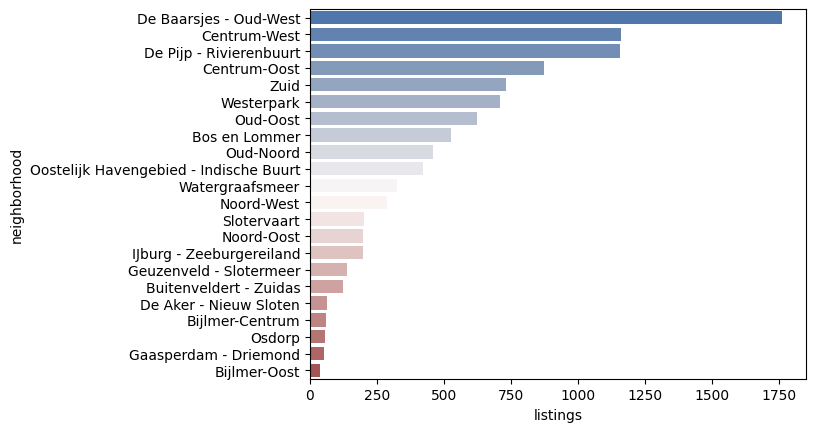

In [19]:
num_nei = listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)
nei_df = num_nei.reset_index()
nei_df.columns = ['neighborhood', 'listings']
ax = sns.barplot(nei_df, y='neighborhood', x='listings', hue='neighborhood', palette='vlag', legend=False)


In [20]:
nei_counts = listings.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean()
nei_counts['count'] = listings.groupby('neighbourhood_cleansed').size()
nei_counts = nei_counts.reset_index()
# nei_counts

fig = px.scatter_mapbox(
    nei_counts,
    lat="latitude",
    lon="longitude",
    size='count', 
    size_max=30,
    hover_name="neighbourhood_cleansed",
    hover_data={'count' : True, 'latitude' : False, 'longitude' : False},
    zoom=11,
    height=600
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

pio.write_image(fig, "occupancy_map.png")
Image(filename="occupancy_map.png")

fig.show()

/var/folders/75/ss0qcr9161d0_pl20ccbncy40000gp/T/ipykernel_61010/2321461891.py:6: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


In [21]:
nei_counts_d = nei_counts[['neighbourhood_cleansed', 'count']]

In [22]:
fig = px.pie(
    data_frame = nei_counts_d,
    names='neighbourhood_cleansed',
    values='count',
    title='Percentage of placements by neighbourhood',
    hole=0.3 
)

pio.write_image(fig, "occupancy_pie.png")
Image(filename="occupancy_pie.png")

fig.show()

The neighbourhood with the largest number of accommodations is Oud-West

#### Average price by neighbourhoods 

In [23]:
listings['price'] = listings['price'].replace('[$,€]', '', regex=True).astype(float)

In [24]:
listings['price'].median()

np.float64(223.0)

In [25]:
listings['price'].mean().round(2)

np.float64(364.92)

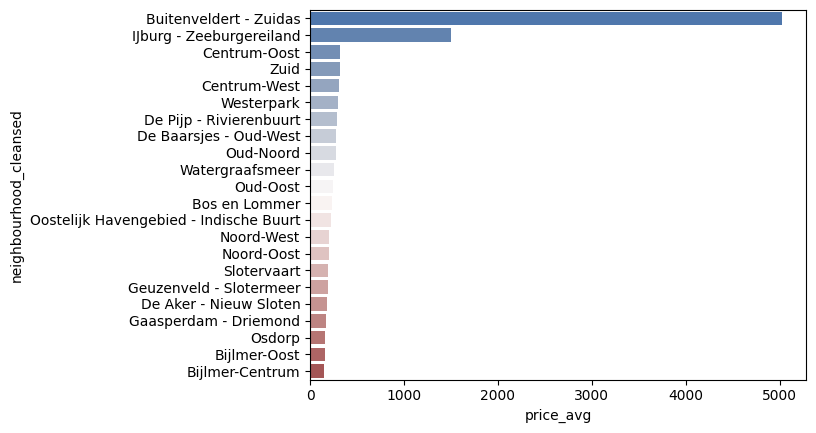

In [26]:
nei_counts['price_avg'] = listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()['price'].round(2)
nei_counts = nei_counts.sort_values(by='price_avg', ascending=False)

ax = sns.barplot(nei_counts, y='neighbourhood_cleansed', x='price_avg', hue='neighbourhood_cleansed', palette='vlag', legend=False)

A significant spike in the data for the Zaud and IJburg areas with using **mean()**

**median()**, which is the average value, in this case more accurately reflects the main trend.

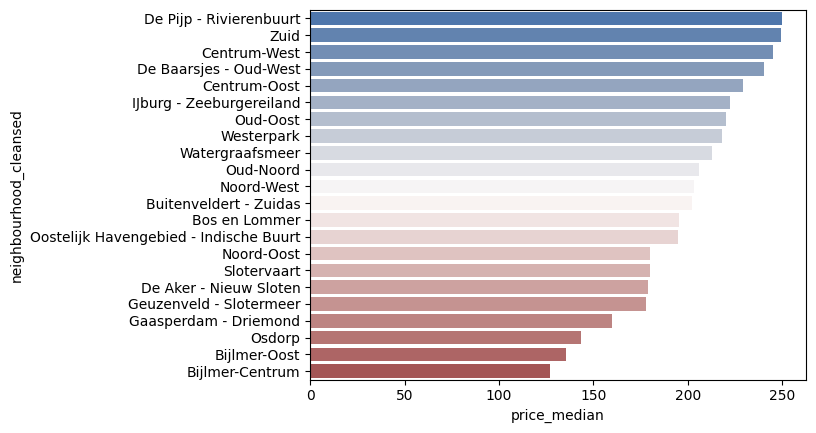

In [27]:
nei_counts['price_median'] = listings.groupby('neighbourhood_cleansed')['price'].median().reset_index()['price'].round(2)
nei_counts = nei_counts.sort_values(by='price_median', ascending=False)

ax = sns.barplot(nei_counts, y='neighbourhood_cleansed', x='price_median', hue='neighbourhood_cleansed', palette='vlag', legend=False)

In [54]:
fig = px.scatter_mapbox(
    nei_counts,
    lat="latitude",
    lon="longitude",
    size='price_median', 
    size_max=30,
    hover_name="neighbourhood_cleansed",
    hover_data={'price_median' : True, 'latitude' : False, 'longitude' : False},
    zoom=11,
    height=600
)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

pio.write_image(fig, "average_price_map.png")
Image(filename="average_price_map.png")

fig.show()

/var/folders/75/ss0qcr9161d0_pl20ccbncy40000gp/T/ipykernel_61010/3874201295.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Prices increase as the neighbourhood gets closer to the city center  

#### Types of accommodations

Number of listings by property type 

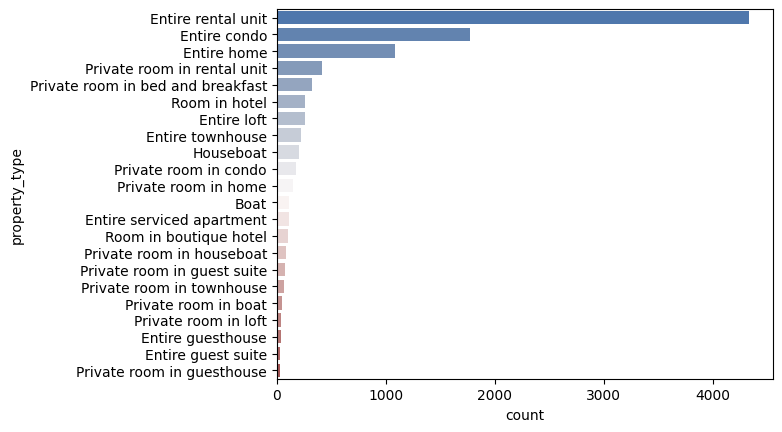

In [29]:
type_acc = listings['property_type'].value_counts()
type_acc_df = type_acc.reset_index()
# type_acc_df['count'].median()
# type_acc_df.shape
top_types = type_acc_df[type_acc_df['count'] > 20]

ax1 = sns.barplot(top_types, y='property_type', x='count', hue='property_type', palette='vlag', legend=False)

Most listings are entire accommodations (private, non-shared units)

#### Price dependence on the property type

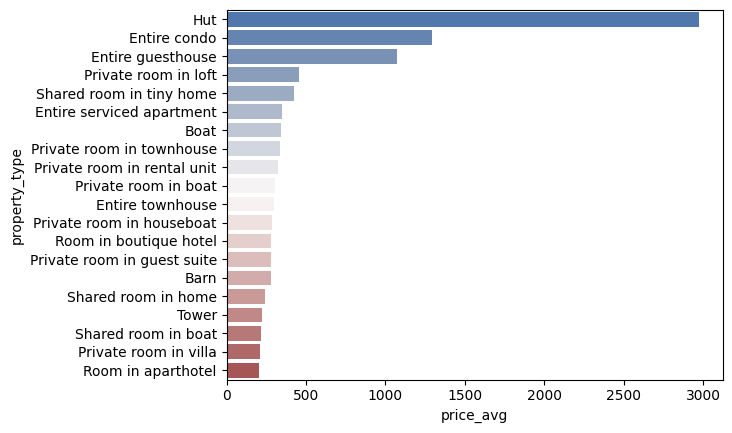

In [30]:
type_acc_df['price_avg'] = listings.groupby('property_type')['price'].mean().reset_index()['price'].round(2)
type_acc_df = type_acc_df.sort_values(by='price_avg', ascending=False)
top_type_acc_df = type_acc_df.head(20)

ax = sns.barplot(top_type_acc_df, y='property_type', x='price_avg', hue='property_type', palette='vlag', legend=False)

The three most expensive property types are huts, entire condos and entire guesthouses 

#### Numbers of accomodations by hosts and Top of hosts 

In [31]:
top_hosts = listings.groupby('host_id')['host_since'].size().reset_index().sort_values(by='host_since', ascending=False).rename(columns={'host_since' : 'count'}).head(20)
top_hosts = top_hosts.merge(
    listings[['host_id', 'host_url', 'host_name']], 
    how='left', 
    on='host_id'
)

In [55]:
fig = px.pie(
    data_frame=top_hosts,
    names='host_id',
    values='count',
    title='TOP-20 of hosts by number of accommodations', 
    hover_data=['host_name'], 
    labels={'host_name' : 'host name ', 'host_id' : 'host_id ', 'count' : 'number of listings '},
    hole=0.3
)

pio.write_image(fig, "top_hosts_pie.png")
Image(filename="top_hosts_pie.png")

fig.show()

#### Price dependence on capacity

In [33]:
capacity_plot = listings.groupby('accommodates')['price'].mean().round(2).reset_index()
capacity_plot

,accommodates,price
0,1,96.24
1,2,297.04
2,3,239.50
3,4,472.99
4,5,333.59
5,6,759.38
6,7,689.73
7,8,585.86
8,9,720.00
9,10,417.33


In [56]:
fig = px.scatter(
    capacity_plot,
    x='accommodates',
    y='price',
    title='Price per night depending on capacity',
    labels={'accommodates': 'Capacity', 'price': 'Price per night (€)'},
    opacity=0.5
)

pio.write_image(fig, "price_dependence_scatter.png")
Image(filename="price_dependence_scatter.png")

fig.show()

#### Average accomodation capacity  

In [35]:
capacity_avg = listings.groupby('accommodates').size().round(2).reset_index(name='avg_count')
capacity_avg.sort_values(by='avg_count', ascending=False)

,accommodates,avg_count
1,2,5374
3,4,3312
2,3,791
4,5,222
5,6,201
0,1,173
6,7,31
7,8,29
14,16,14
11,12,7


Most listings accommodate two people

#### Average ratings by neighbourhoods

In [57]:
neighbourhood_reviews = listings.groupby('neighbourhood_cleansed')[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                                                                    'review_scores_value']].mean().round(2).reset_index()
neighbourhood_reviews = neighbourhood_reviews.sort_values(by='review_scores_value', ascending=False)
neighbourhood_reviews_melt = neighbourhood_reviews.melt(id_vars='neighbourhood_cleansed', 
                                                        value_vars=['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'],
                                                        var_name='rating_types', 
                                                        value_name='review_value') 


fig = px.bar(
    neighbourhood_reviews_melt,
    x='neighbourhood_cleansed',
    y='review_value',
    color='rating_types',
    barmode='group',
    title='Average ratings by neighbourhoods'
)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis_title = "Neighbourhoods",
                  yaxis_title = "Average rating", 
                  title_font_size = 20)

pio.write_image(fig, "ratings.png")
Image(filename="ratings.png")

fig.show()

There are no significant differences in the ratings of the various districts of Amsterdam, which suggests that guest satisfaction is generally the same throughout Amsterdam

#### Activities by years / months 

In [37]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month_name()

In [38]:
year_reviews = reviews.groupby('year')['listing_id'].count().reset_index().rename(columns={'listing_id' : 'num_reviews'})
months_reviews = reviews.groupby(['year', 'month'])['listing_id'].count().reset_index().rename(columns={'listing_id' : 'num_reviews'})

In [58]:
fig = px.bar(
    year_reviews,
    x='year',
    y='num_reviews',
    title='Number of reviews by years'
)


fig.update_layout(xaxis_title = "Year",
                  yaxis_title = "Number of reviews", 
                  title_font_size = 20)

pio.write_image(fig, "number_reviews.png")
Image(filename="number_reviews.png")

fig.show()

2020 is the begining of the Covid19 <br>
In 2022 people started travelling again <br>
The trend towards an increase of travel and short-term rent 

In [40]:
month_mean = months_reviews.groupby('month')['num_reviews'].mean().round(2).reset_index().rename(columns={'num_reviews' : 'mean'}).sort_values(by='mean')

In [59]:
fig = px.bar(
    month_mean,
    x='month',
    y='mean',
    title='Average ratings by neighbourhoods'
)

fig.update_layout(xaxis_title = "Month",
                  yaxis_title = "Average number of reviews", 
                  title_font_size = 20)

pio.write_image(fig, "average_ratings.png")
Image(filename="average_ratings.png")

fig.show()

December to February are the quietest months, possibly due to winter holidays and cold weather <br>
May shows the highest activity, likely thanks to pleasant weather and public holidays.

#### Connection of price with rating

In [42]:
reviews_count = reviews.groupby('listing_id').size().reset_index(name='review_count')
list_price = listings[['id', 'price']]
listings_reviews = list_price.merge(reviews_count, how='left', left_on='id', right_on='listing_id')
listings_reviews['review_count'] = listings_reviews['review_count'].fillna(0).astype(int)
listings_reviews = listings_reviews[listings_reviews['review_count'] > 0]


In [60]:
fig = px.scatter(
    listings_reviews, 
    x = 'review_count', 
    y = 'price', 
    hover_data = 'id', 
    title = 'The relationship between price and number of review'
)

pio.write_image(fig, "price_numb_reviews.png")
Image(filename="price_numb_reviews.png")

fig.show()

There is no clear relationship between the price and the number of reviews

#### Calendar

In [44]:
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month_name()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month
0,2818,2025-03-03,f,89.0,NaN,3.0,1125.0,2025,March
1,2818,2025-03-04,t,89.0,NaN,3.0,1125.0,2025,March
2,2818,2025-03-05,t,89.0,NaN,3.0,1125.0,2025,March
3,2818,2025-03-06,t,89.0,NaN,3.0,1125.0,2025,March
4,2818,2025-03-07,t,89.0,NaN,3.0,1125.0,2025,March


#### Procent of available days     

In [45]:
(calendar['available'].value_counts(normalize=True)['t'] * 100).round(2)

np.float64(23.35)

The occupancy rate in Amsterdam is high — 77% which indicates high demand and popularity among tourists. <br>
This may also indicate a potential shortage of available accommodations on the market

#### The occupancy of neighbourhoods

In [46]:
calendar_neigh = calendar.merge(listings[['id', 'neighbourhood_cleansed']], left_on='listing_id', right_on='id', how='left')
calendar_neigh = calendar_neigh.dropna(subset=['id'])

In [47]:
occupancy_neigh = calendar_neigh.groupby('neighbourhood_cleansed').agg(
    total_days = ('available', 'count'),
    unavailable_days = ('available', lambda x: (x == 'f').sum())
).reset_index()
occupancy_neigh['occupancy_rate'] = (occupancy_neigh['unavailable_days'] / occupancy_neigh['total_days']).round(2)
occupancy_neigh = occupancy_neigh.sort_values(by='occupancy_rate', ascending=False)
occupancy_neigh

,neighbourhood_cleansed,total_days,unavailable_days,occupancy_rate
2,Bos en Lommer,175930,148368,0.84
18,Slotervaart,67525,56446,0.84
19,Watergraafsmeer,105480,87803,0.83
14,Oostelijk Havengebied - Indische Buurt,138335,113151,0.82
20,Westerpark,239075,193366,0.81
17,Oud-Oost,214255,173313,0.81
1,Bijlmer-Oost,12775,10291,0.81
7,De Baarsjes - Oud-West,594947,476640,0.80
13,Noord-West,97820,77943,0.80
11,IJburg - Zeeburgereiland,67160,52985,0.79


In [48]:
geo = listings.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean()
occupancy_neigh2 = occupancy_neigh.merge(geo, on='neighbourhood_cleansed', how='left')
occupancy_neigh2

,neighbourhood_cleansed,total_days,unavailable_days,occupancy_rate,latitude,longitude
0,Bos en Lommer,175930,148368,0.84,52.378383,4.851338
1,Slotervaart,67525,56446,0.84,52.358426,4.835190
2,Watergraafsmeer,105480,87803,0.83,52.348472,4.930250
3,Oostelijk Havengebied - Indische Buurt,138335,113151,0.82,52.366098,4.939767
4,Westerpark,239075,193366,0.81,52.382986,4.875372
5,Oud-Oost,214255,173313,0.81,52.357217,4.919007
6,Bijlmer-Oost,12775,10291,0.81,52.321072,4.978686
7,De Baarsjes - Oud-West,594947,476640,0.80,52.366250,4.862786
8,Noord-West,97820,77943,0.80,52.412321,4.900138
9,IJburg - Zeeburgereiland,67160,52985,0.79,52.357359,4.993319


In [61]:
fig = px.scatter_mapbox(
    occupancy_neigh2,
    lat="latitude",
    lon="longitude",
    color="occupancy_rate", 
    size="occupancy_rate",   
    hover_name="neighbourhood_cleansed",
    hover_data=["occupancy_rate"],
    color_continuous_scale="YlOrRd",
    size_max=20,
    zoom=11,
    height=600,
    mapbox_style="carto-positron"
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig.write_image("map.png")

pio.write_image(fig, "occupancy_map.png")
Image(filename="occupancy_map.png")

fig.show()

/var/folders/75/ss0qcr9161d0_pl20ccbncy40000gp/T/ipykernel_61010/460470337.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



The greatest demand is concentrated in the areas adjacent to the city center, but not inside it. <br>
This probably reflects a trade-off between proximity and affordability: <br>
areas closer to the center have lower occupancy rates due to higher prices, while areas further away have less demand, possibly due to less convenient access to the city center.

#### The occupancy of property type

In [50]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month
0,2818,2025-03-03,f,89.0,NaN,3.0,1125.0,2025,March
1,2818,2025-03-04,t,89.0,NaN,3.0,1125.0,2025,March
2,2818,2025-03-05,t,89.0,NaN,3.0,1125.0,2025,March
3,2818,2025-03-06,t,89.0,NaN,3.0,1125.0,2025,March
4,2818,2025-03-07,t,89.0,NaN,3.0,1125.0,2025,March


In [51]:
type_occ = calendar.merge(listings[['id', 'property_type']], left_on='listing_id', right_on='id', how='left')
type_occ = type_occ.dropna(subset=['id'])
# type_occ.groupby('property_type')['']

In [52]:
type_occ['is_booked'] = type_occ['available'].apply(lambda x: 1 if x == 'f' else 0)
type_occ
occ_by_type = type_occ.groupby('property_type')['is_booked'].mean().reset_index(name='occ_rate')
occ_by_type['occ_rate'] = (occ_by_type['occ_rate'] * 100).round(2)
occ_by_type = occ_by_type.sort_values(by='occ_rate', ascending=False)
occ_by_type

,property_type,occ_rate
61,Yurt,100.00
4,Cave,100.00
54,Shared room in home,100.00
5,Earthen home,100.00
44,Private room in vacation home,100.00
...,...,...
58,Shared room in townhouse,30.96
52,Room in serviced apartment,29.45
57,Shared room in houseboat,24.76
46,Private room in windmill,8.49


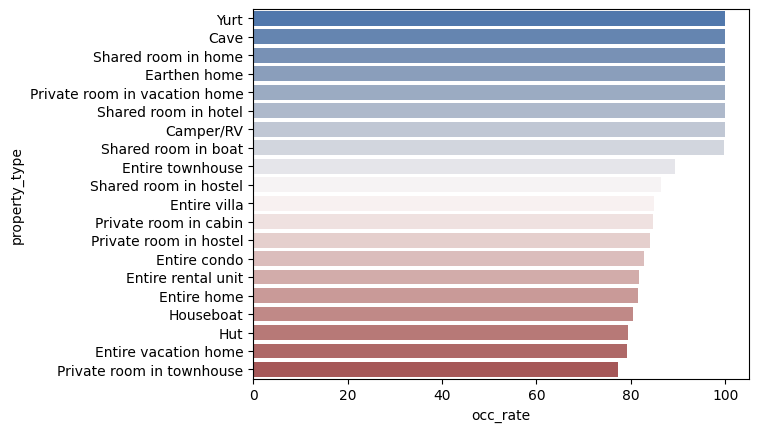

In [53]:
top_occ_by_type = occ_by_type.head(20)

ax = sns.barplot(top_occ_by_type, x = 'occ_rate', y = 'property_type', hue='property_type', palette = 'vlag', legend=False)

Therefore, it can be concluded that tourists choose interesting options or cheap ones